In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Project/dataset/NFLX_Stock.csv',usecols=['Date', 'Price'])#, parse_dates=['Date'], index_col='Date')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1392 non-null   object 
 1   Price   1392 non-null   float64
dtypes: float64(1), object(1)
memory usage: 21.9+ KB


In [4]:
def get_feature_date(df):
  df['Date'] = pd.to_datetime(df['Date'])

  df['day'] = df['Date'].dt.day
  df['month'] = df['Date'].dt.month
  df['year'] = df['Date'].dt.year

  return df

df = get_feature_date(df)
df

,Date,Price,day,month,year
0,2017-12-01,186.82,1,12,2017
1,2017-12-04,184.04,4,12,2017
2,2017-12-05,184.21,5,12,2017
3,2017-12-06,185.30,6,12,2017
4,2017-12-07,185.20,7,12,2017
...,...,...,...,...,...
1387,2023-06-08,409.37,8,6,2023
1388,2023-06-09,420.02,9,6,2023
1389,2023-06-12,423.97,12,6,2023
1390,2023-06-13,435.73,13,6,2023


In [ ]:
X = df.drop(columns=['Date','Price'])
y = df['Price']

In [ ]:
choose = 1

# 7:2:1
if choose == 1:
  train_size = int(0.7 * len(X))
  test_size = int(0.2 * len(X))
  val_size = len(X) - train_size - test_size

  X_train = X[:train_size]
  y_train = y[:train_size]

  X_test = X[train_size:train_size+test_size]
  y_test = y[train_size:train_size+test_size]

  X_val = X[train_size+test_size:]
  y_val = y[train_size+test_size:]

# 5:3:2
elif choose == 2:
  train_size = int(0.5 * len(X))
  test_size = int(0.3 * len(X))
  val_size = len(X) - train_size - test_size

  X_train = X[:train_size]
  y_train = y[:train_size]

  X_test = X[train_size:train_size+test_size]
  y_test = y[train_size:train_size+test_size]

  X_val = X[train_size+test_size:]
  y_val = y[train_size+test_size:]

# 5:3:2
elif choose == 3:
  train_size = int(0.6 * len(X))
  test_size = int(0.2 * len(X))
  val_size = len(X) - train_size - test_size

  X_train = X[:train_size]
  y_train = y[:train_size]

  X_test = X[train_size:train_size+test_size]
  y_test = y[train_size:train_size+test_size]

  X_val = X[train_size+test_size:]
  y_val = y[train_size+test_size:]

print("Train: ", train_size)
print("Test: ", test_size)
print("Val: ", val_size)

Train:  974
Test:  278
Val:  140


In [ ]:
k = 5  # Number of neighbors
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
def mae_rmse_mape(true, predict):
  mae = mean_absolute_error(true, predict)
  rmse = np.sqrt(mean_squared_error(true, predict))
  mape = mean_absolute_percentage_error(true, predict)

  return mae, rmse, mape

In [ ]:
test_pred = knn.predict(X_test)
mae_test, rmse_test, mape_test = mae_rmse_mape(y_test, test_pred)

val_pred = knn.predict(X_val)
mae_val, rmse_val, mape_val = mae_rmse_mape(y_val, val_pred)

print('MAE of Test: ', mae_test)
print('RMSE of Test: ', rmse_test)
print('MAPE of Test: ', mape_test)
print('------------------------')
print('MAE of Validation: ', mae_val)
print('RMSE of Validation: ', rmse_val)
print('MAPE of Validation: ', mape_val)

MAE of Test:  228.1283165467626
RMSE of Test:  249.30938139040455
MAPE of Test:  0.9171938930401197
------------------------
MAE of Validation:  189.7724142857143
RMSE of Validation:  194.45273625426674
MAPE of Validation:  0.5847287635707837


In [ ]:
from datetime import datetime, timedelta

#end_date = datetime(2023, 5, 20)
n_days = 30
last_date = df['Date'].max()
end_date = last_date + timedelta(days=n_days)
date_list = [end_date - timedelta(days=i-1) for i in range(30)]

data = pd.DataFrame({'Date': date_list})
data = data.sort_values(by='Date', ascending=True).reset_index(drop=True)

data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')

In [ ]:
def predict_FeatureDate(model, data):
  data['Date'] = pd.to_datetime(data['Date'])

  data['day'] = data['Date'].dt.day
  data['month'] = data['Date'].dt.month
  data['year'] = data['Date'].dt.year

  pred_future = model.predict(data.drop(columns='Date'))

  return pred_future

pred_future = predict_FeatureDate(knn, data)
pred_future

array([511.182, 493.348, 492.406, 501.74 , 503.062, 503.802, 505.644,
       511.586, 512.422, 510.346, 510.224, 512.194, 518.5  , 522.36 ,
       521.4  , 516.198, 516.198, 509.724, 507.446, 519.834, 523.54 ,
       524.714, 517.95 , 517.672, 514.292, 513.008, 523.406, 530.516,
       524.674, 522.6  ])

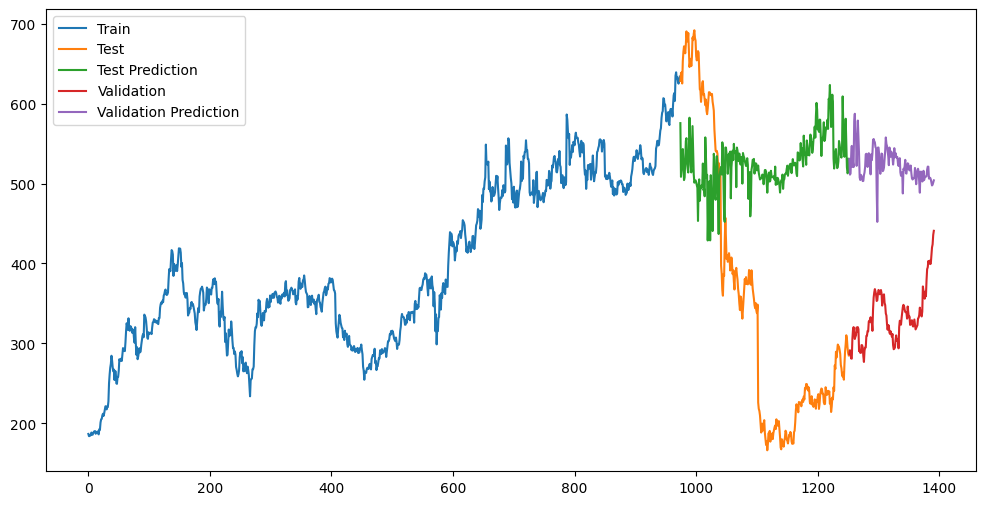

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(y_train, label='Train')

plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Test')
plt.plot(range(len(y_train), len(y_train) + len(y_test)),  test_pred, label='Test Prediction')

plt.plot(range(len(y_train) + len(y_test), len(y_train) + len(y_test) + len(y_val)), y_val, label='Validation')
plt.plot(range(len(y_train) + len(y_test), len(y_train) + len(y_test) + len(y_val)), val_pred, label='Validation Prediction')


#plt.plot(range(len(y_train) + len(y_test) + len(y_val), len(y_train) + len(y_test) + len(y_val) + 30), future_mean.reshape(-1, 1), label='30days_Next')

plt.legend()
plt.show()

In [ ]:

# plt.figure(figsize=(12,6))

# plt.plot(df['Date'][:train_size], y_train, label='Train')

# plt.plot(df['Date'][train_size:train_size+test_size], y_test, label='Test')
# plt.plot(df['Date'][train_size:train_size+test_size], test_pred, label='Test predict')

# plt.plot(df['Date'][train_size+test_size:], y_val, label='Validation')
# plt.plot(df['Date'][train_size+test_size:], val_pred, label='Validation predict')

# plt.plot(df_pred['Date'], pred_future, label='30 next days')

# plt.legend()
# plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_neighbors': [1,3,5,7,9,11]
}

model = KNeighborsRegressor()


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print('Best Parameters:', grid_search.best_params_)

Best Parameters: {'n_neighbors': 5}


In [ ]:
best_model = grid_search.best_estimator_

test_pred = best_model.predict(X_test)
mae_test, rmse_test, mape_test = mae_rmse_mape(y_test, test_pred)

val_pred = best_model.predict(X_val)
mae_val, rmse_val, mape_val = mae_rmse_mape(y_val, val_pred)

print('MAE of Test: ', mae_test)
print('RMSE of Test: ', rmse_test)
print('MAPE of Test: ', mape_test)
print('------------------------')
print('MAE of Validation: ', mae_val)
print('RMSE of Validation: ', rmse_val)
print('MAPE of Validation: ', mape_val)

MAE of Test:  228.1283165467626
RMSE of Test:  249.30938139040455
MAPE of Test:  0.9171938930401197
------------------------
MAE of Validation:  189.7724142857143
RMSE of Validation:  194.45273625426674
MAPE of Validation:  0.5847287635707837


In [ ]:
pred_future = predict_FeatureDate(best_model, data)
pred_future

array([511.182, 493.348, 492.406, 501.74 , 503.062, 503.802, 505.644,
       511.586, 512.422, 510.346, 510.224, 512.194, 518.5  , 522.36 ,
       521.4  , 516.198, 516.198, 509.724, 507.446, 519.834, 523.54 ,
       524.714, 517.95 , 517.672, 514.292, 513.008, 523.406, 530.516,
       524.674, 522.6  ])

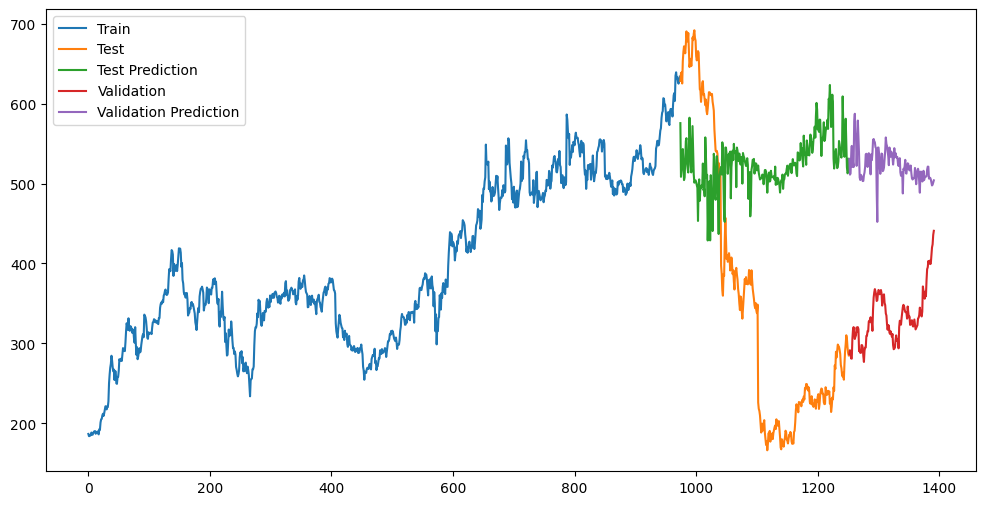

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(y_train, label='Train')

plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='Test')
plt.plot(range(len(y_train), len(y_train) + len(y_test)),  test_pred, label='Test Prediction')

plt.plot(range(len(y_train) + len(y_test), len(y_train) + len(y_test) + len(y_val)), y_val, label='Validation')
plt.plot(range(len(y_train) + len(y_test), len(y_train) + len(y_test) + len(y_val)), val_pred, label='Validation Prediction')


#plt.plot(range(len(y_train) + len(y_test) + len(y_val), len(y_train) + len(y_test) + len(y_val) + 30), future_mean.reshape(-1, 1), label='30days_Next')

plt.legend()
plt.show()